### Data Augmentation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import cv2
import warnings
from PIL import Image
from glob import glob

plt.style.use('default')
sns.set_theme()
warnings.filterwarnings('ignore')

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder



In [ ]:
%%capture
!unzip /content/petfinder-pawpularity-score.zip

In [ ]:
train_df = pd.read_csv('train.csv')
print("Training data shape:", train_df.shape)
print("\nFirst few rows of the dataset:")
display(train_df.head())

Training data shape: (9912, 14)

First few rows of the dataset:


,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [ ]:
train_img_dir = "/content/train/"
train_images = glob(os.path.join(train_img_dir, "*.jpg"))

#adding image path to train_df
train_df["image_path"] = train_df["Id"].apply(lambda x: os.path.join(train_img_dir, x + ".jpg"))

train_df = train_df[train_df["image_path"].isin(train_images)]

train_df.head()


,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,image_path
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63,/content/train/0007de18844b0dbbb5e1f607da0606e...
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42,/content/train/0009c66b9439883ba2750fb825e1d7d...
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28,/content/train/0013fd999caf9a3efe1352ca1b0d937...
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15,/content/train/0018df346ac9c1d8413cfcc888ca824...
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72,/content/train/001dc955e10590d3ca4673f034feeef...


In [ ]:
test_df = pd.read_csv('test.csv')
print("Testing data shape:", test_df.shape)
print("\nFirst few rows of the dataset:")
display(test_df.head())

Testing data shape: (8, 13)

First few rows of the dataset:


,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0


In [ ]:
test_img_dir = "/content/test/"
test_images = glob(os.path.join(test_img_dir, "*.jpg"))

#adding image path to test_df
test_df["image_path"] = test_df["Id"].apply(lambda x: os.path.join(test_img_dir, x + ".jpg"))

test_df = test_df[test_df["image_path"].isin(test_images)]

test_df.head()


,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,image_path
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1,/content/test/4128bae22183829d2b5fea10effdb0c3...
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0,/content/test/43a2262d7738e3d420d453815151079e...
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1,/content/test/4e429cead1848a298432a0acad014c9d...
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0,/content/test/80bc3ccafcc51b66303c2c263aa38486...
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0,/content/test/8f49844c382931444e68dffbe20228f4...


Visualzing Data Augmentation

In [ ]:
# Define individual augmentations
augmentations = {
    "Original": transforms.Compose([]),
    "Horizontal Flip": transforms.Compose([transforms.RandomHorizontalFlip(p=1)]),
    "Rotation": transforms.Compose([transforms.RandomRotation(degrees=45)]),
    "Random Crop": transforms.Compose([transforms.RandomResizedCrop(224, scale=(0.5, 1.0))]),
    "Color Jitter": transforms.Compose([transforms.ColorJitter(brightness=0.6, contrast=0.3, saturation=0.4, hue=0.3)]),
    "Grayscale": transforms.Compose([transforms.Grayscale(num_output_channels=3)]),
    "Center Crop": transforms.Compose([transforms.CenterCrop((224, 224))]),
    "Solarize": transforms.Compose([transforms.RandomSolarize(threshold = 30, p=0.7)])}


Plot Augments Function

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

def plot_augments(image_paths, transform, title, color_space = cv2.COLOR_BGR2RGB):
    """
    Displays the same augmentation applied to 6 different images in a 2x3 grid.

    :param image_paths: List of 6 image paths
    :param transform: PyTorch transform to apply
    """
    # Define subplots
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 5))
    plt.suptitle(f"{title} Augmentation", fontsize=12)

    for i, image_path in enumerate(image_paths):
        # Read the image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, color_space)  # Convert BGR to RGB
        image = Image.fromarray(image)  # Convert to PIL Image

        # Apply transformation
        augmented_image = transform(image) if transform else image

        # Convert back to NumPy for visualization
        augmented_image = np.array(augmented_image)

        # Get subplot position
        row, col = divmod(i, 3)

        # Plot the image
        axes[row, col].imshow(augmented_image)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()


Original without transformation

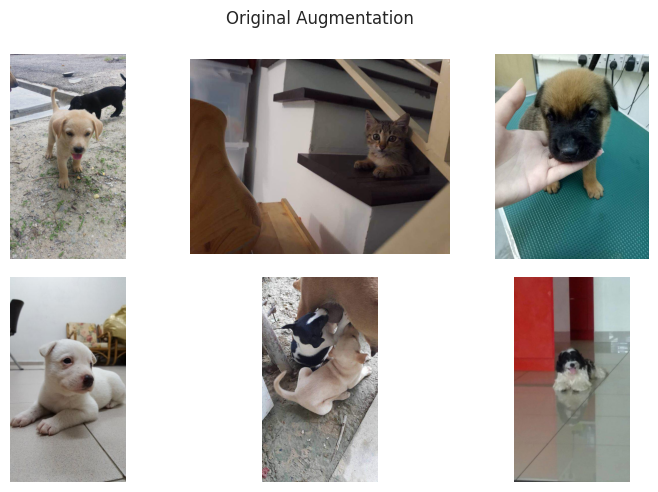

In [ ]:
# Select first 6 images from dataset
sample_images = train_df["image_path"].to_list()[0:6]

# Plot augmented versions
plot_augments(sample_images, augmentations['Original'], 'Original')

Center Crop

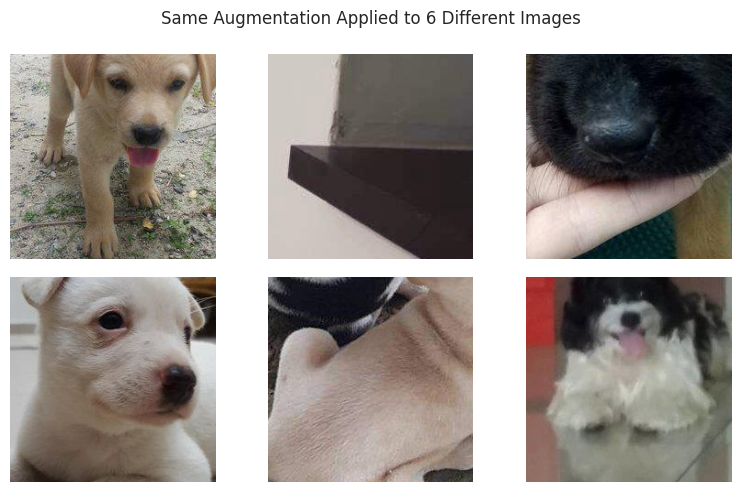

In [ ]:
plot_augments(sample_images, augmentations['Center Crop'], 'Center Crop')

Horizontal Flip

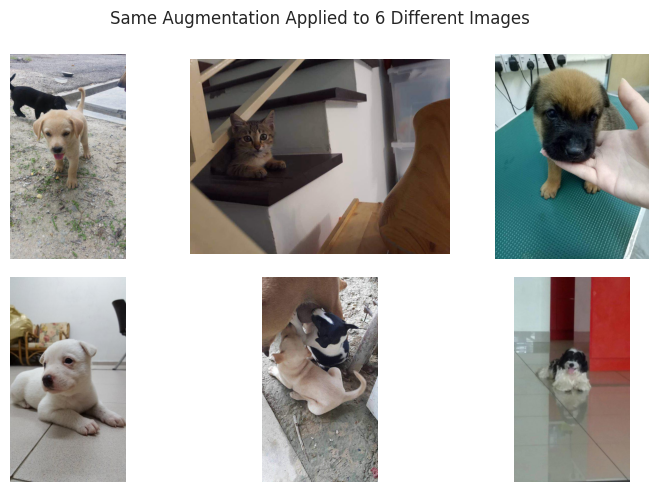

In [ ]:
plot_augments(sample_images, augmentations['Horizontal Flip'], 'Horizontal Flip')

Rotation

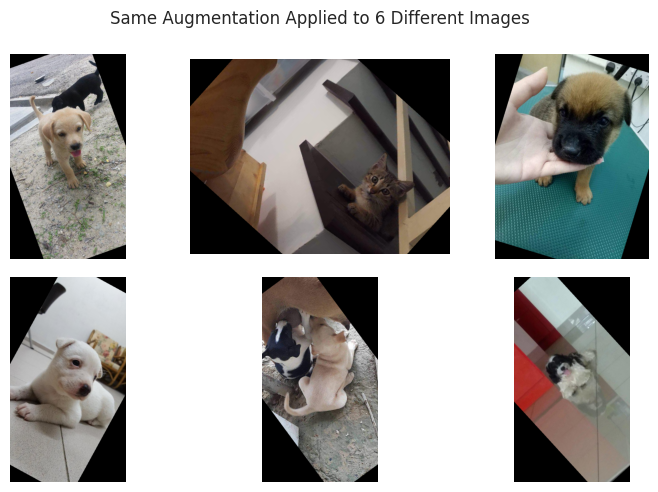

In [ ]:
plot_augments(sample_images, augmentations['Rotation'], 'Rotation')

Random Crop

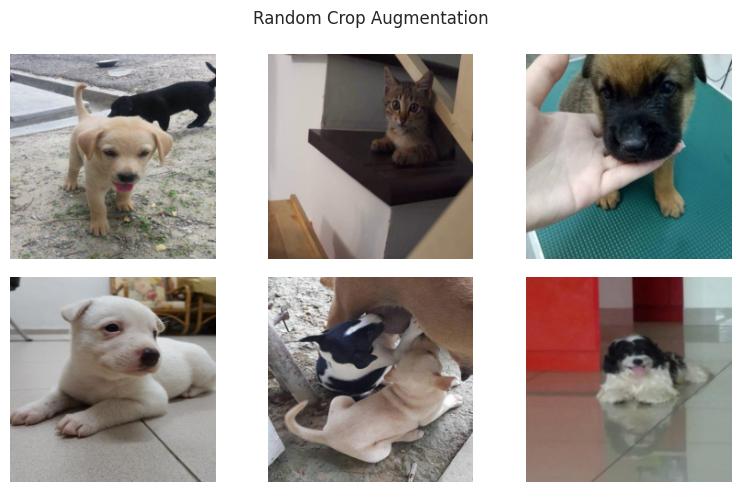

In [ ]:
plot_augments(sample_images, augmentations['Random Crop'], 'Random Crop')

Color Jitter

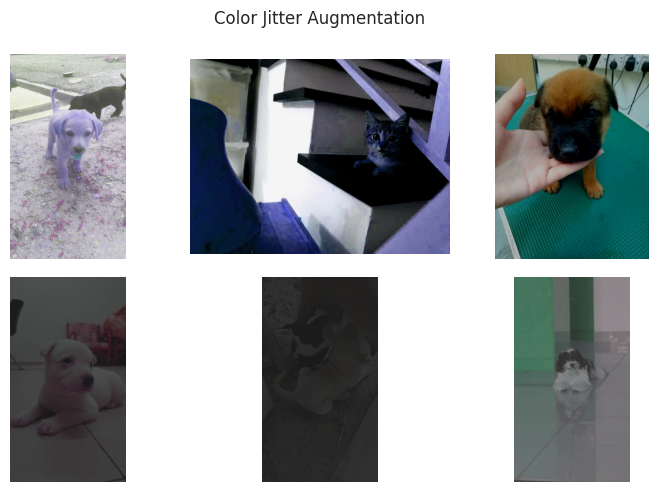

In [ ]:
plot_augments(sample_images, augmentations['Color Jitter'], 'Color Jitter')

Grayscale

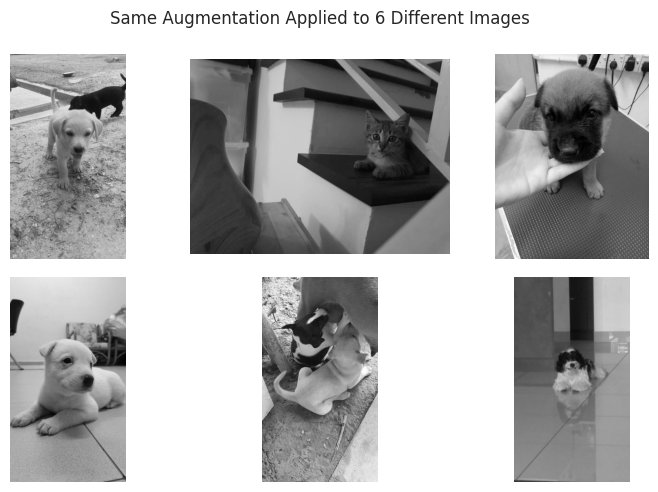

In [ ]:
plot_augments(sample_images, augmentations['Grayscale'], 'Grayscale')

Color Space: Alpha Channel

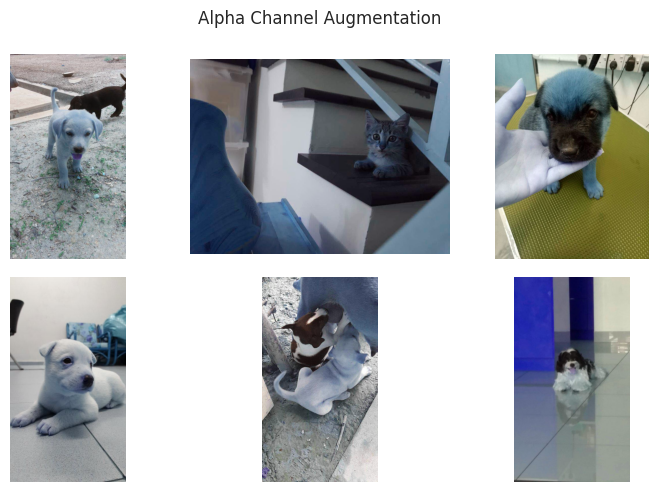

In [ ]:
plot_augments(sample_images, augmentations['Original'], 'Alpha Channel',cv2.COLOR_RGB2RGBA )
